In [62]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [63]:
height = 28
width = 28
raw_image_channel = 1
pixels = height*width*raw_image_channel
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [64]:
def initial_weight(shape):
    return tf.get_variable('W', shape=shape, initializer=tf.truncated_normal_initializer())
def initial_bias(shape):
    return tf.get_variable('b', shape=shape, initializer=tf.constant_initializer(value=0.1))

In [65]:
def fc_layer(bottom, width, name, act_fn='sigmoid'):
    input_size = bottom.shape[-1]
    with tf.variable_scope(name):
        w = initial_weight([input_size, width])
        b = initial_bias(width)
        s = tf.matmul(bottom, w) + b
        if act_fn == 'relu':
            h = tf.nn.relu(s)
        elif act_fn == 'tanh':
            h = tf.nn.tanh(s)
        elif act_fn == 'sigmoid':
            h = tf.nn.sigmoid(s)
        elif act_fn is None:
            h = s
    return h

In [66]:
def autoencoder(x):
    e1 = fc_layer(x, 128, 'encoder1')
    code = fc_layer(e1, 32, 'encoder2') # Not limited code range
    d1 = fc_layer(code, 128, 'decoder1')
    logits = fc_layer(d1, pixels, 'decoder2', act_fn=None)
    x_construct = tf.sigmoid(logits)
    return logits, x_construct

In [67]:
def evaluate(x, logits, x_construct, loss_type):
    if loss_type=='mse':
        loss = tf.losses.mean_squared_error(x, x_construct)
    else:
        loss = tf.losses.sigmoid_cross_entropy(x, logits)
    return loss

In [68]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, [None, pixels], name='x')
logits, x_construct = autoencoder(x)
loss = evaluate(x, logits, x_construct, 'mse')
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss)

In [69]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(25000):
    batch = mnist.train.next_batch(50)
    if i % 1000 == 0:
        train_loss = sess.run(loss, feed_dict={x: batch[0]})
        print('step {}, training loss {:.4f}'.format(i, train_loss))
    sess.run(train_step, feed_dict={x: batch[0]})

step 0, training loss 0.4177
step 1000, training loss 0.1047
step 2000, training loss 0.0900
step 3000, training loss 0.0785
step 4000, training loss 0.0820
step 5000, training loss 0.0766
step 6000, training loss 0.0768
step 7000, training loss 0.0733
step 8000, training loss 0.0712
step 9000, training loss 0.0692
step 10000, training loss 0.0662
step 11000, training loss 0.0660
step 12000, training loss 0.0682
step 13000, training loss 0.0617
step 14000, training loss 0.0627
step 15000, training loss 0.0638
step 16000, training loss 0.0617
step 17000, training loss 0.0645
step 18000, training loss 0.0617
step 19000, training loss 0.0633
step 20000, training loss 0.0606
step 21000, training loss 0.0578
step 22000, training loss 0.0603
step 23000, training loss 0.0573
step 24000, training loss 0.0572


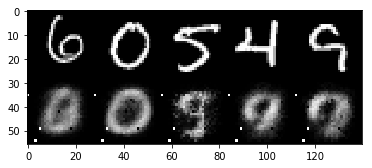

In [70]:
test_x = mnist.test.images[100:105,:]
res_x = sess.run(x_construct, feed_dict={x: test_x})
test_im = np.reshape(test_x, [-1, height, width])
res_im = np.reshape(res_x, [-1, height, width])
test_im_append = np.concatenate([test_im[i,:,:] for i in range(5)], axis=1)
res_im_append = np.concatenate([res_im[i,:,:] for i in range(5)], axis=1)
out_im = np.concatenate([test_im_append, res_im_append], axis=0)
plt.imshow(out_im, 'gray')

https://gertjanvandenburg.com/blog/autoencoder/
https://www.reddit.com/r/MachineLearning/comments/1tym0s/relu_for_autoencoder/
http://www.ycc.idv.tw/YCNote/post/43

In [80]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, [2,2])
y = tf.placeholder(tf.float32, [2,2])
loss = tf.losses.sigmoid_cross_entropy(x, y)
sess = tf.Session()
xx = np.array([[0.5,0.5],[0.4,0.4]], dtype=np.float32)
yy = np.array([[0.6,0.5],[0.4,0.5]], dtype=np.float32)
sess.run(loss, {x:xx, y:yy})

0.74716425

In [84]:
np.mean(xx*-np.log(yy)+(1-xx)*-np.log(1-yy))

0.6932161